In [8]:
# first importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# we are going to use linear regression
from sklearn import linear_model

In [13]:
# now loading the boston data set
from sklearn.datasets import load_boston
boston_ds = load_boston()


In [14]:
# transforming the data set into usable data frame 

df = pd.DataFrame(boston_ds.data, columns=boston_ds.feature_names)
df['MEDV'] = boston_ds.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
df.info()
# we can conlude that their is no categorical data in our data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# 1.data exploration and visualisation 

Text(0.5, 1.0, 'crime rate vs MEDV')

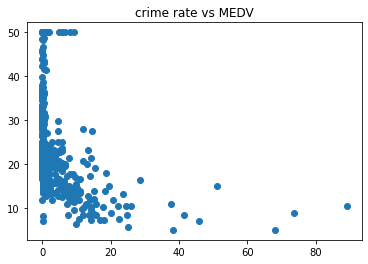

In [22]:
#let us see the the factors affecting the MEDV

#first the CRIM (crime rate by town)
plt.scatter(df.CRIM,df.MEDV)
plt.title("crime rate vs MEDV")

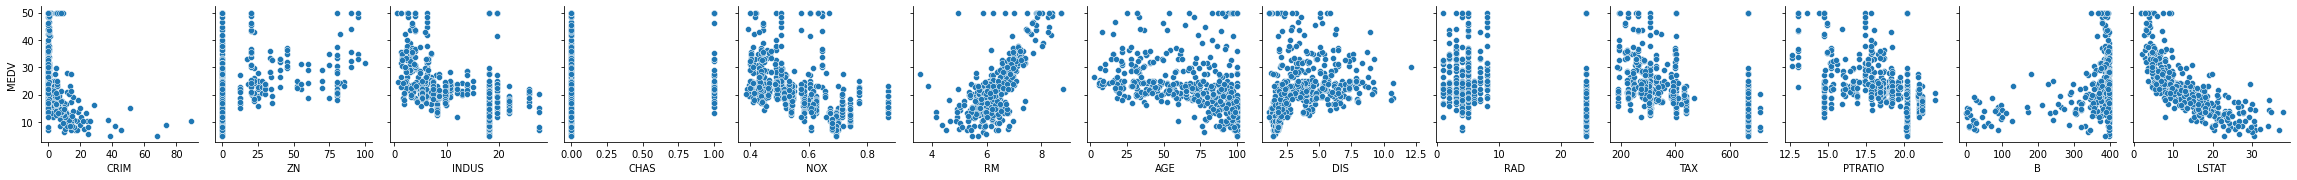

In [45]:
%matplotlib inline

sns.pairplot(df, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX',
   'PTRATIO','B','LSTAT'], y_vars='MEDV')


# 2.data preprocessing 

In [18]:
#checking for null values 
df.isnull().sum()

# we don't have any null values in our data frame

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [49]:
# standadization 
cols = ['CRIM','ZN','TAX','B']
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data 
scaled_cols = scalar.fit_transform(df[cols]) 
scaled_cols = pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [50]:
#replacing the values in our fata frame 
for col in cols:
    df[col] = scaled_cols[col]

# model training 

In [51]:
X = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV']

In [52]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 22.098694827097972
CV Score: 37.13180746769895


<AxesSubplot:title={'center':'Model Coefficients'}>

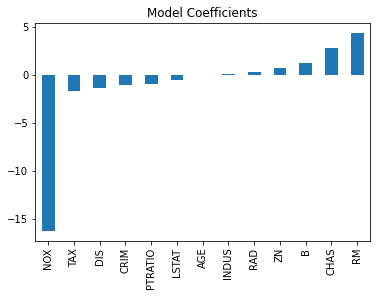

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

